In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import umap

In [23]:
df = pd.read_csv('Join_data.csv').iloc[:,1:]

In [24]:
df.corr(method='pearson')

,gameId,teamId,champ_WR_dif,user_champ_WR,top_tier,jug_tier,mid_tier,carry_tier,support_tier,c_top_tier,...,marksman,controller,c_slayer,c_tank,c_fighter,c_mage,c_marksman,c_controller,match_cnt,win
gameId,1.000000,0.043550,-0.066775,0.008772,-0.029896,0.001377,-0.019604,-0.004242,-0.031767,-0.037417,...,0.017579,-0.070844,-0.040217,0.028312,0.007361,0.037591,-0.013598,-0.029054,-0.110313,-0.000361
teamId,0.043550,1.000000,-0.137012,0.010114,0.024701,0.022401,0.004474,0.044557,0.006939,-0.012979,...,-0.013610,0.026239,-0.016477,0.035207,-0.005801,0.029360,-0.014568,-0.035903,-0.024535,-0.016757
champ_WR_dif,-0.066775,-0.137012,1.000000,0.058302,0.000087,-0.060093,-0.008711,-0.168896,-0.114253,0.126065,...,-0.049037,0.011872,0.036244,-0.244821,0.089626,0.076933,0.034980,-0.009854,0.070583,0.054047
user_champ_WR,0.008772,0.010114,0.058302,1.000000,0.020281,-0.021419,-0.018010,-0.070491,0.004413,-0.000604,...,-0.035101,0.034870,0.009343,-0.002706,-0.038699,0.056407,0.016003,-0.037013,0.106546,0.439009
top_tier,-0.029896,0.024701,0.000087,0.020281,1.000000,-0.035172,-0.011685,-0.003128,0.002182,0.003451,...,0.050209,0.069611,-0.022445,-0.009981,0.002819,0.012357,0.033100,-0.011981,0.031466,-0.010304
jug_tier,0.001377,0.022401,-0.060093,-0.021419,-0.035172,1.000000,0.049447,0.000691,-0.004356,0.019598,...,-0.286550,-0.006109,-0.027426,0.039545,-0.000026,-0.020383,0.024894,-0.012681,-0.060041,-0.010229
mid_tier,-0.019604,0.004474,-0.008711,-0.018010,-0.011685,0.049447,1.000000,-0.004152,0.026894,0.003773,...,-0.015725,0.088775,-0.007120,-0.004529,-0.010040,-0.012464,0.008990,0.035300,0.023185,-0.010404
carry_tier,-0.004242,0.044557,-0.168896,-0.070491,-0.003128,0.000691,-0.004152,1.000000,0.081664,0.007446,...,-0.215299,0.092971,-0.039683,-0.002875,0.038941,0.012002,0.001992,-0.021572,0.008202,-0.060120
support_tier,-0.031767,0.006939,-0.114253,0.004413,0.002182,-0.004356,0.026894,0.081664,1.000000,0.010220,...,0.022724,0.100704,-0.034670,-0.020129,0.005483,0.005550,-0.007383,0.058305,-0.060757,-0.013617
c_top_tier,-0.037417,-0.012979,0.126065,-0.000604,0.003451,0.019598,0.003773,0.007446,0.010220,1.000000,...,-0.038544,-0.011215,-0.010739,-0.119056,-0.037107,0.056038,0.054120,0.087729,-0.024205,0.022961


In [25]:
knn = KNeighborsClassifier()

In [26]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

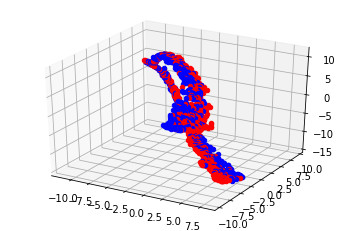

In [27]:
tsne = TSNE(n_components=3, perplexity=100, learning_rate=300)
X_tsne = tsne.fit_transform(X)
X_data=pd.DataFrame(X_tsne,columns=('1','2','3'))
data = pd.concat((X_data,y),axis=1)

fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(data)):
    if data.loc[:,'win'][i]==True:
        x_=data['1'][i]
        y_=data['2'][i]
        z_=data['3'][i]


        ax.scatter(x_,y_,z_,c='r',label='win')
        
    else:
        x_=data['1'][i]
        y_=data['2'][i]
        z_=data['3'][i]
        ax.scatter(x_,y_,z_,c='b',label='lose')

plt.show()

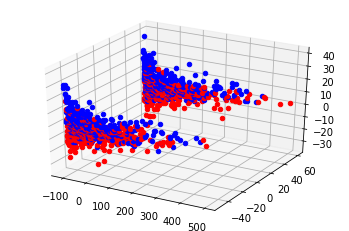

In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_data=pd.DataFrame(X_pca,columns=('1','2','3'))
data = pd.concat((X_data,y),axis=1)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(data)):
    if data.loc[:,'win'][i]==True:
        x_=data['1'][i]
        y_=data['2'][i]
        z_=data['3'][i]


        ax.scatter(x_,y_,z_,c='r',label='win')
        
    else:
        x_=data['1'][i]
        y_=data['2'][i]
        z_=data['3'][i]
        ax.scatter(x_,y_,z_,c='b',label='lose')
plt.show()

In [ ]:
pca.explained_variance_ratio_()

In [121]:
X_cen= X-X.mean(axis=0)
X_cov= np.dot(X_cen.T, X_cen)/59

In [122]:
w,v=np.linalg.eig(X_cov)

In [123]:
w/w.sum()

array([ 7.97954966e-01,  1.95279887e-01,  4.85270936e-03,  1.92550227e-04,
        1.91270160e-04,  1.78057642e-04,  1.71163180e-04,  1.58766955e-04,
        1.56969293e-04,  1.40647263e-04,  1.19519049e-04,  1.15768854e-04,
        1.03231593e-04,  6.48333744e-05,  5.88651076e-05,  4.78701981e-05,
        4.98546110e-05,  3.65636727e-05,  3.20181647e-05,  2.91133615e-05,
        2.73323030e-05,  1.80688581e-05,  1.99566146e-05,  1.64347386e-08,
       -1.31317613e-20,  4.58298409e-20])

C:\Users\DongwonLee\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


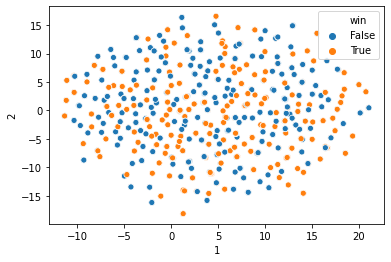

In [126]:
um = umap.UMAP(n_neighbors=2,min_dist=0.1).fit_transform(X)
um=pd.DataFrame(um,columns=('1','2'))
sns.scatterplot(x=um['1'],y=um['2'],hue=data['win'])

In [45]:
svm=svm.SVC(probability=True)

In [46]:
svm.fit(X,y)

SVC(probability=True)

In [47]:
svm.score(X,y)

0.6806318681318682

In [48]:
list(X.iloc[1,:])

[200.0,
 -0.009500000000000008,
 54.8,
 5.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 5.0,
 1.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 229.2]

In [50]:
svm.predict_proba([[100,0.1,52.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,200]])

array([[0.46730535, 0.53269465]])

In [13]:
result = cross_val_score(svm,X,y)

In [14]:
result.mean()

0.6346467071505908

In [15]:
k_range = list(range(1,31))

In [16]:
param_grid = dict(n_neighbors = k_range) 

In [17]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [18]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [19]:
grid_mean_scores = grid.cv_results_['mean_test_score']

Text(0, 0.5, 'Cross-Validated Accuracy')

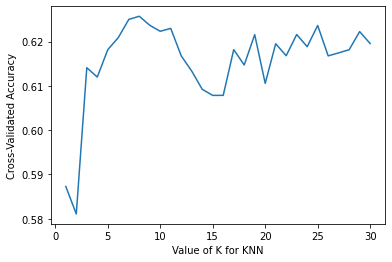

In [20]:
plt.plot(k_range,grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6257345299952763
{'n_neighbors': 8}
KNeighborsClassifier(n_neighbors=8)


In [139]:
df_copy= df.copy()

In [140]:
def remove_outlier_test(df_c,column):
    fraud_column_data = df_c[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quan_75 - quan_25
    IQR += 1.5
    lowest = quan_25 - IQR
    higest = quan_75 + IQR
    outlier_index = fraud_column_data[(fraud_column_data < lowest ) | (fraud_column_data > higest)].index
    print(len(outlier_index))
    df_c.drop(outlier_index, axis=0, inplace=True)
    return df_c

In [146]:
df_copy = remove_outlier_test(df_copy,'carry_tier')

32


In [147]:
X_cp=df_copy.iloc[:,1:-1]
y_cp=df_copy.iloc[:,-1]

In [150]:
svm.fit(X_cp,y_cp)

SVC()

In [151]:
svm.score(X_cp,y_cp)

0.6445461479786423